In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [21]:
data_train = pd.read_csv("data/train_data.csv")
data_test = pd.read_csv("data/test_data.csv")
train = data_train.copy()
test = data_train.copy()

In [22]:
train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,1,12.247694,0.235294,0.5,0.0,0.033420,0.0,0.5,1.0,1.0,...,0.5,0.0,0.0,0.090909,0.50,1.0,0.5,0.0,0.0,0.0
1,2,12.109011,0.000000,0.5,0.0,0.038795,0.0,0.5,1.0,1.0,...,0.5,0.0,0.0,0.363636,0.25,1.0,0.5,0.0,0.0,0.0
2,3,12.317167,0.235294,0.5,0.0,0.046507,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,0.727273,0.50,1.0,0.5,0.0,0.0,0.0
3,4,11.849398,0.294118,0.5,0.0,0.038561,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,0.090909,0.00,1.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.5,0.0,0.060576,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,1.000000,0.50,1.0,0.5,0.0,0.0,0.0


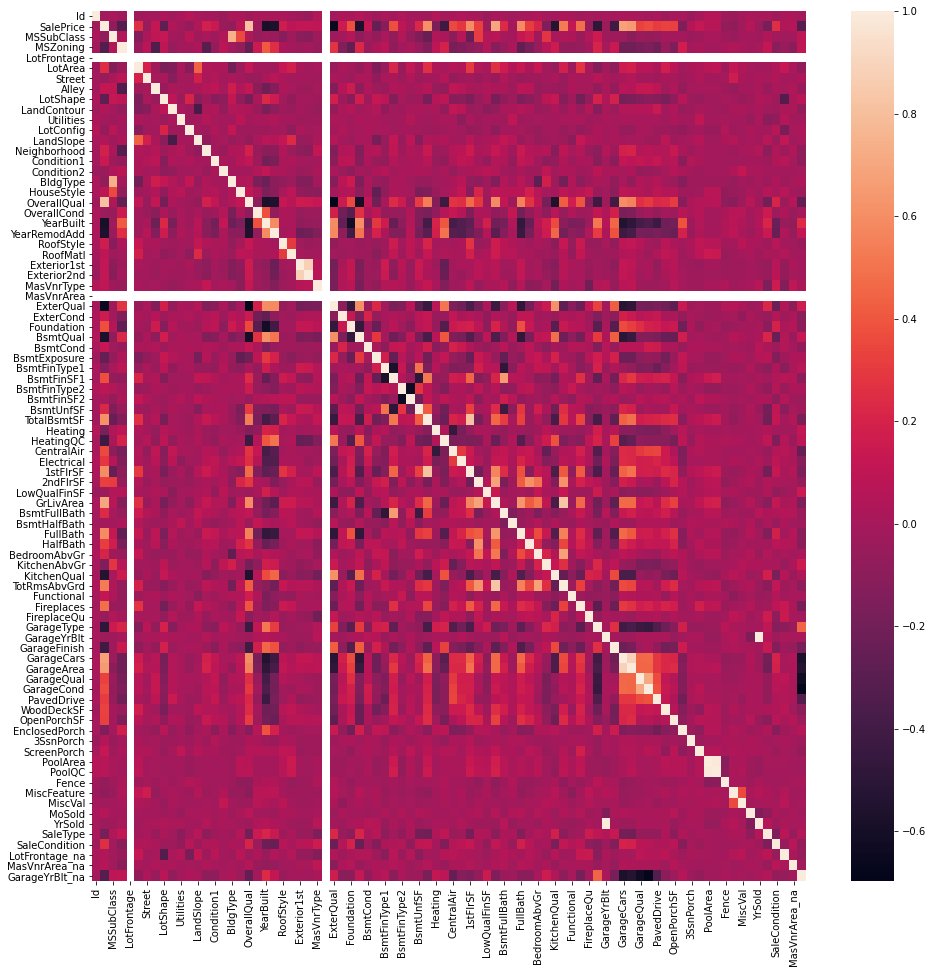

In [23]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr())
plt.show()

In [25]:
X = train.drop(['Id','SalePrice'],1)
y = train['SalePrice']

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
sel = ExtraTreesRegressor()
sel.fit(X,y)

ExtraTreesRegressor()

In [6]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

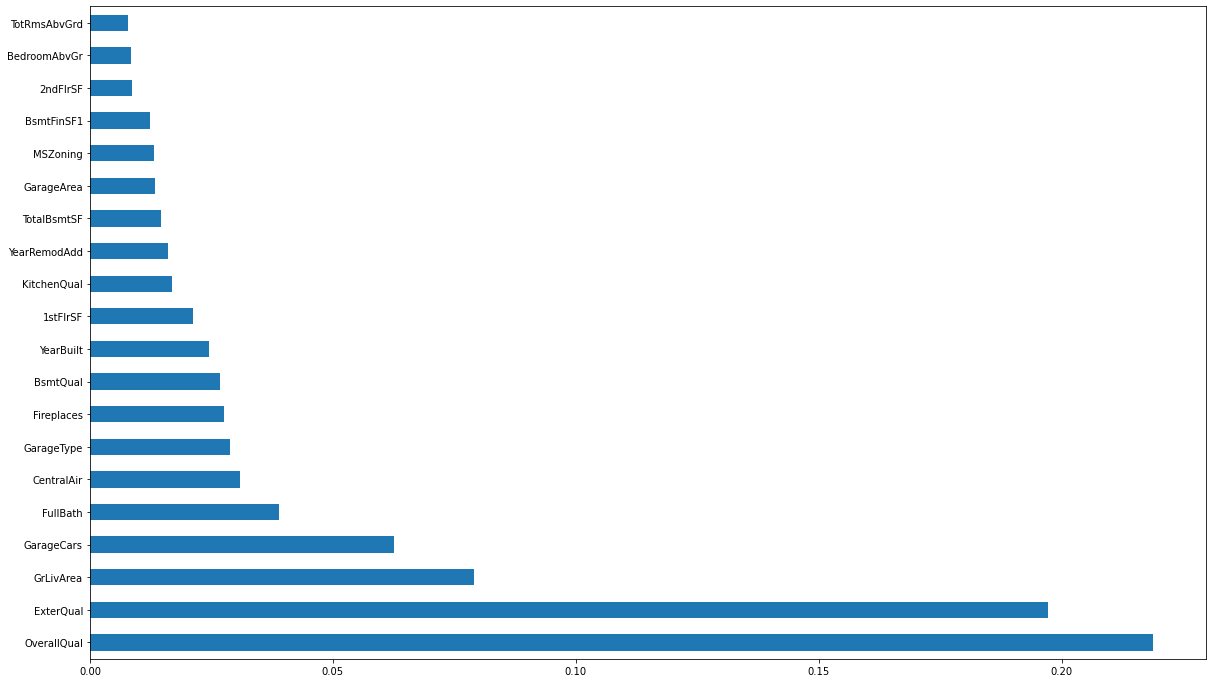

In [29]:
plt.figure(figsize=(20,12))
feat_importance = pd.Series(sel.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.25,random_state=26)

In [68]:
from sklearn.linear_model import Lasso,Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def check_models(x,y,tx,ty):
    models = [Lasso(),Ridge(), LinearRegression()]
    acc = {}
    for model in models:
        #print(model)
        model.fit(x,y)
        y_pred = model.predict(tx)
#         print(f"training accuracy: {model.score(x,y)}")
#         print(f"testing accuracy: {model.score(tx,ty)}")
#         print(f"mae : {mean_absolute_error(ty,y_pred)}")
#         print(f"mse : {mean_squared_error(ty,y_pred)}")
#         print(f"r2 : {r2_score(ty,y_pred)}")
        acc[model] = r2_score(ty,y_pred)


                        
        #print("*"*20)
    best = (max(acc, key=acc.get))
    print(f"the best model is {best} with the score of {round(acc[best],4)}")

        

In [69]:
check_models(train_x,train_y,test_x,test_y)

the best model is Ridge() with the score of 0.7748


In [7]:
feat_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=26))
feat_sel_model.fit(train_x,train_y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=26))

In [8]:
feat_sel_model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True, False,  True,  True, False, False,  True,  True,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [9]:
selected_feat = train_x.columns[feat_sel_model.get_support()]

print(f"total features: {train_x.shape[1]}")
print(f"selected features: {len(selected_feat)}")
print(f"feat with coef == 0: {np.sum(feat_sel_model.estimator_.coef_ == 0)}")





total features: 82
selected features: 23
feat with coef == 0: 59


In [10]:
selected_feat

Index(['MSZoning', 'LotShape', 'BldgType', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

In [11]:
train_x = train_x[selected_feat]

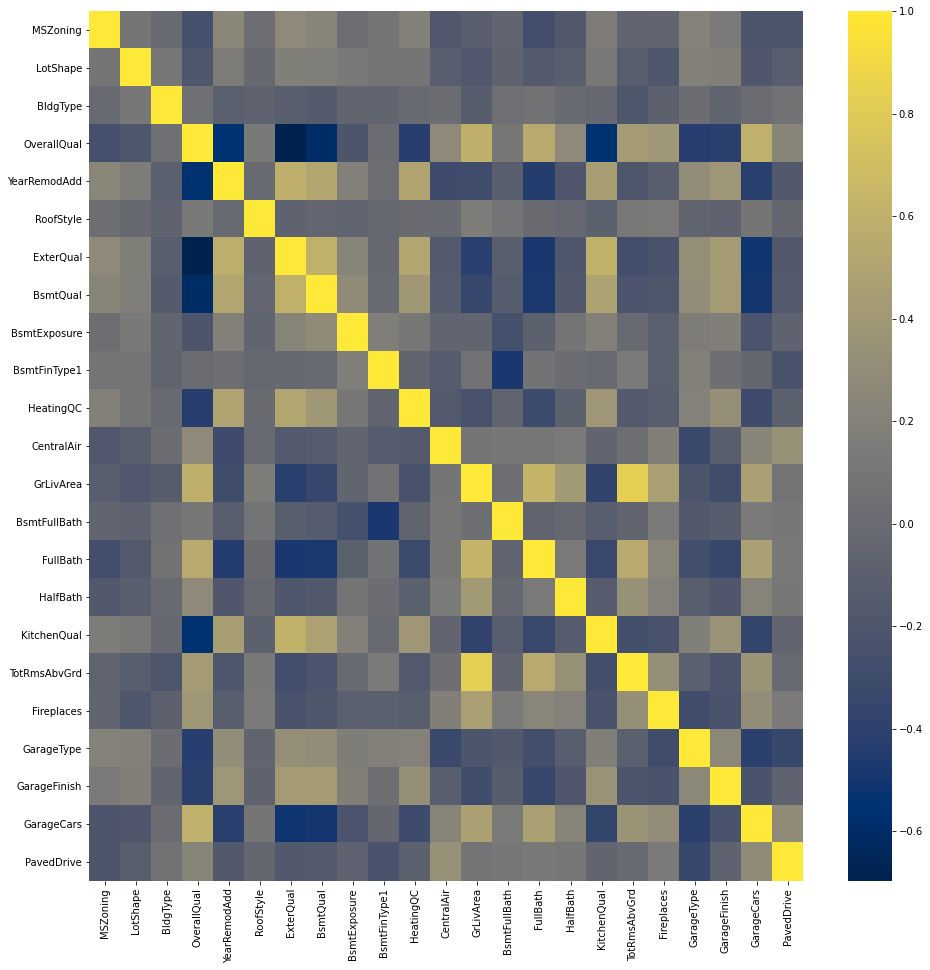

In [19]:
plt.figure(figsize=(16,16))
sns.heatmap(train_x.corr(),cmap="cividis")
plt.show()